In [1]:
#这个Code用于计算疾病相关的SNP在Peak中的富集程度

In [1]:

from __future__ import division
import pandas as pd
import numpy as np
import sys
import os
import argparse
import itertools
import collections
import math
import random
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.patches as mpatches
import sklearn 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [2]:
def Mkdir(Dir):
    if not os.path.exists(Dir):
        os.mkdir(Dir)

def Read(File):
    return pd.read_table(File,sep='\t',index_col=0)

def ReadBed(File):
    Bed=pd.read_table(File,sep='\t',index_col=None,header=None)
    Bed.index=Bed[3]
    return Bed

def Save(DF,File):
    DF.to_csv(File,sep='\t')

def SaveBed(Bed,File):
    Bed.to_csv(File,sep='\t',index=False,header=False)
    
def GetState(i):
    if 'Norm' in i: return 'Norm'
    if 'Arm' in i: return 'Arm'
    if 'Back' in i:return 'Back'

def ReadTable(Infile):return pd.read_table(Infile,sep='\t',index_col=0)


In [3]:

GRASPFile='/Users/liuqian/Documents/ATAC-seq_project/ForLiuQian/All_GRASP2_SNP.txt'
GRASPBed='/Users/liuqian/Documents/A_SSC_project/Norm/SNP_Enrichment/All_GRASP2_SNP.bed'
peakano='/Users/liuqian/Documents/A_SSC_project/Norm/NormSkinPeaks.bed.ano.txt'
bedfile='/Users/liuqian/Documents/A_SSC_project/Norm/NormSkinPeaks.bed'
peakfile='/Users/liuqian/Documents/A_SSC_project/Norm/PeakCount.QNorm_Normalized.txt'
OutDir='/Users/liuqian/Documents/A_SSC_project/Norm/SNP_Enrichment/'

Mkdir(OutDir)


In [4]:
#将所有的GWAS结果和GRASP的结果整合，成一个完整的包含所有疾病的SNP文件
GWASFile='/Users/liuqian/Documents/ATAC-seq_project/ForLiuQian/gwas_catalog_v1.0.2-associations_e96_r2019-11-21.tsv'                                   
GWASDF=ReadTable(GWASFile)[['CHR_ID','CHR_POS','MAPPED_GENE','SNPS','P-VALUE','DISEASE/TRAIT']]
GWASDF['Chr']=['chr'+str(i) for i in GWASDF['CHR_ID']]
GWASDF2=GWASDF[['Chr','CHR_POS','CHR_POS','SNPS','P-VALUE','DISEASE/TRAIT']]
GWASDF2.columns=range(len(list(GWASDF2)))
GWASDF2.to_csv(os.path.join(OutDir,'All_GWAS_SNP.bed'),sep='\t',index=False,header=False)


/Users/liuqian/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (9,23,27,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:
#将所有SSc相关的SNP总结到最终的list中
NewSScFile='/Users/liuqian/Documents/A_SSC_project/SSc_NC_fromHW_SNP.txt'
GWAS_New_SSc_DF=pd.read_table(NewSScFile,index_col=None,sep='\t')[['Chr','Pos','Pos','SNPs','P-values','Disease']]
GWAS_New_SSc_DF['Chr']=['chr'+str(i) for i in list(GWAS_New_SSc_DF['Chr'])]
GWAS_New_SSc_DF.columns=range(len(list(GWAS_New_SSc_DF)))



In [6]:
GRASPBed=ReadBed(GRASPBed)


In [7]:
FinalSNPBed=pd.concat([GRASPBed,GWASDF2,GWAS_New_SSc_DF],axis=0)


In [8]:
FinalSNPBed[5]=[i.lower().split('(')[0] for i in FinalSNPBed[5]]
FinalSNPBed.index=range(len(FinalSNPBed))


In [9]:
#去除重复的对应
RemoveFinalSNPBed=FinalSNPBed[[0,1,2,3,5]].drop_duplicates()
FinalSNPBed=FinalSNPBed.loc[RemoveFinalSNPBed.index]


In [10]:
A=list(FinalSNPBed[FinalSNPBed[5]=='systemic sclerosis'][3])
print len(A),len(set(A))


499 485


In [24]:
Diseases=list(set(['ankylosing spondylitis','asthma','atopic dermatitis','celiac disease','chronic kidney disease',"crohn's disease",'rheumatoid arthritis','multiple sclerosis','inflammatory bowel disease','psoriasis','systemic lupus erythematosus','celiac disease',"crohn's disease",'inflammatory bowel disease','primary biliary cirrhosis','ulcerative colitis','sarcoidosis','systemic sclerosis']))       



In [25]:
for g in Diseases:
    Save(FinalSNPBed[FinalSNPBed[5]==g],"/Users/liuqian/Google Drive/SScATACseq/Figures_V18_liuqian/AddMacrophage/Revision_V3/"+g+'.txt')                                                      



In [12]:

OldIndex=[]
for i in FinalSNPBed.index:
    if i%10000==0:
        print i
    I=FinalSNPBed.loc[i][1]
    try: 
        int(I)
    except:
        OldIndex.append(i)
        print FinalSNPBed.loc[i]



0
10000
20000
30000
40000
50000
60000
70000
80000
100000
110000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
960000
970000
980000
990000
1000000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1330000
1340000
1350000
1360000
1370000
1380000
1390000
1400000
1410000
1420000
1430000
14400

Name: 8873335, dtype: object
0                            chrnan
1                               NaN
2                               NaN
3                       HLA-B*08:01
4                            4E-246
5    primary sclerosing cholangitis
Name: 8873396, dtype: object
0                            chrnan
1                               NaN
2                               NaN
3                    HLA-DQA1*05:01
4                            6E-175
5    primary sclerosing cholangitis
Name: 8873397, dtype: object
0                            chrnan
1                               NaN
2                               NaN
3                     HLA-DQA*01:03
4                            1E-100
5    primary sclerosing cholangitis
Name: 8873398, dtype: object
0                            chrnan
1                               NaN
2                               NaN
3                    HLA-DRB1*15:01
4                              5E-9
5    primary sclerosing cholangitis
Name: 8873399, dtype

Name: 8879002, dtype: object
0                       chrnan
1                          NaN
2                          NaN
3             7:83689041_ATT_A
4                        1E-16
5    heel bone mineral density
Name: 8879061, dtype: object
0                                chrnan
1                                   NaN
2                                   NaN
3    7:28830059_GAGAGAGAGAGAGAGAGAGAT_G
4                                 4E-20
5             heel bone mineral density
Name: 8879073, dtype: object
0                       chrnan
1                          NaN
2                          NaN
3              7:120439631_A_C
4                        4E-11
5    heel bone mineral density
Name: 8879078, dtype: object
0                       chrnan
1                          NaN
2                          NaN
3       7:120970768_GAAAAAAA_G
4                       1E-300
5    heel bone mineral density
Name: 8879100, dtype: object
0                       chrnan
1                         

0                   chr11 x 2
1         92975544 x 74645439
2         92975544 x 74645439
3    rs10830963 x rs116472028
4                        2E-7
5            type 2 diabetes 
Name: 8881734, dtype: object
0                  chr11 x 2
1       92975544 x 196198526
2       92975544 x 196198526
3    rs10830963 x rs16846841
4                       7E-7
5           type 2 diabetes 
Name: 8881735, dtype: object
0                 chr11 x 16
1        92975544 x 81489408
2        92975544 x 81489408
3    rs10830963 x rs17197883
4                       1E-8
5           type 2 diabetes 
Name: 8881736, dtype: object
0                chr11 x 18
1       92975544 x 12427119
2       92975544 x 12427119
3    rs10830963 x rs7228666
4                      2E-6
5          type 2 diabetes 
Name: 8881737, dtype: object
0                  chr11 x 8
1         92975544 x 2729924
2         92975544 x 2729924
3    rs10830963 x rs73659517
4                       9E-6
5           type 2 diabetes 
Name: 8881738,

0                       chrnan
1                          NaN
2                          NaN
3               1:8657844_AT_A
4                        1E-23
5    heel bone mineral density
Name: 8882889, dtype: object
0                  chr11 x 4
1       92975544 x 184318008
2       92975544 x 184318008
3    rs10830963 x rs10866267
4                       2E-6
5           type 2 diabetes 
Name: 8882891, dtype: object
0                  chr11 x 8
1         92975544 x 2729847
2         92975544 x 2729847
3    rs10830963 x rs73659516
4                       1E-6
5           type 2 diabetes 
Name: 8882892, dtype: object
0                 chr11 x 8
1       92975544 x 63170404
2       92975544 x 63170404
3    rs10830963 x rs1369455
4                      2E-6
5          type 2 diabetes 
Name: 8882894, dtype: object
0                 chr11 x 8
1       92975544 x 63288263
2       92975544 x 63288263
3    rs10830963 x rs4739079
4                      4E-6
5          type 2 diabetes 
Name: 8882895,

0                  chr6 x 6
1       31306778 x 31423624
2       31306778 x 31423624
3    rs10484554 x rs4418214
4                     6E-34
5                 psoriasis
Name: 8884459, dtype: object
0                   chr6 x 6
1        31306778 x 31463174
2        31306778 x 31463174
3    rs10484554 x rs45533135
4                      3E-33
5                  psoriasis
Name: 8884460, dtype: object
0                  chr6 x 6
1       31285148 x 31500769
2       31285148 x 31500769
3    rs12191877 x rs2534666
4                     1E-14
5                 psoriasis
Name: 8884461, dtype: object
0                 chr6 x 6
1      31222526 x 31295974
2      31222526 x 31295974
3    rs3130517 x rs2894207
4                    6E-18
5                psoriasis
Name: 8884462, dtype: object
0                  chr6 x 6
1       31285148 x 31491859
2       31285148 x 31491859
3    rs12191877 x rs2516417
4                     1E-20
5                 psoriasis
Name: 8884463, dtype: object
0              

0                      chrnan
1                         NaN
2                         NaN
3                   exm173678
4                       2E-10
5    normal facial asymmetry 
Name: 8885284, dtype: object
0                      chrnan
1                         NaN
2                         NaN
3                  exm1214111
4                        2E-9
5    normal facial asymmetry 
Name: 8885289, dtype: object
0                      chrnan
1                         NaN
2                         NaN
3                    exm20439
4                       2E-10
5    normal facial asymmetry 
Name: 8885297, dtype: object
0                      chrnan
1                         NaN
2                         NaN
3                   exm456223
4                        8E-8
5    normal facial asymmetry 
Name: 8885301, dtype: object
0                      chrnan
1                         NaN
2                         NaN
3                   exm903362
4                        2E-7
5    normal fa

0                             chrnan
1                                NaN
2                                NaN
3                    chr10:101990216
4                               6E-7
5    adolescent idiopathic scoliosis
Name: 8887330, dtype: object
0                            chrnan
1                               NaN
2                               NaN
3                         nsv831124
4                              3E-6
5    treatment resistant depression
Name: 8887534, dtype: object
0                            chrnan
1                               NaN
2                               NaN
3                         nsv527355
4                              5E-6
5    treatment resistant depression
Name: 8887538, dtype: object
0                                            chrnan
1                                               NaN
2                                               NaN
3                                    HLA-DQB1*03:03
4                                              1E-8

Name: 8889334, dtype: object
0                chrnan
1                   NaN
2                   NaN
3        Chr1:109818306
4                 3E-81
5    cholesterol, total
Name: 8889335, dtype: object
0                chrnan
1                   NaN
2                   NaN
3        Chr1:220970593
4                  2E-9
5    cholesterol, total
Name: 8889336, dtype: object
0                chrnan
1                   NaN
2                   NaN
3        Chr1:234858597
4                 1E-12
5    cholesterol, total
Name: 8889337, dtype: object
0                chrnan
1                   NaN
2                   NaN
3         Chr2:21263900
4                 4E-62
5    cholesterol, total
Name: 8889338, dtype: object
0                chrnan
1                   NaN
2                   NaN
3         Chr2:27730940
4                 8E-20
5    cholesterol, total
Name: 8889339, dtype: object
0                chrnan
1                   NaN
2                   NaN
3         Chr2:44072576
4         

0           chrnan
1              NaN
2              NaN
3    Chr4:88030261
4             7E-9
5    triglycerides
Name: 8890239, dtype: object
0           chrnan
1              NaN
2              NaN
3    Chr6:31265490
4             2E-8
5    triglycerides
Name: 8890240, dtype: object
0           chrnan
1              NaN
2              NaN
3    Chr7:72934510
4            2E-41
5    triglycerides
Name: 8890241, dtype: object
0           chrnan
1              NaN
2              NaN
3    Chr8:18273300
4             1E-7
5    triglycerides
Name: 8890242, dtype: object
0           chrnan
1              NaN
2              NaN
3    Chr8:19844222
4            1E-61
5    triglycerides
Name: 8890243, dtype: object
0            chrnan
1               NaN
2               NaN
3    Chr8:126490972
4             3E-39
5     triglycerides
Name: 8890244, dtype: object
0            chrnan
1               NaN
2               NaN
3    Chr10:94839642
4             3E-10
5     triglycerides
Name: 8890245, d

0                            chrnan
1                               NaN
2                               NaN
3                        16:9247248
4                              6E-6
5    caudate activity during reward
Name: 8892145, dtype: object
0                  chrnan
1                     NaN
2                     NaN
3               rs2338747
4                   3E-13
5    blood protein levels
Name: 8892204, dtype: object
0                            chrnan
1                               NaN
2                               NaN
3                        rs67025039
4                             9E-25
5    chronic inflammatory diseases 
Name: 8892355, dtype: object
0                            chrnan
1                               NaN
2                               NaN
3                        rs11762011
4                             2E-18
5    alcoholic chronic pancreatitis
Name: 8892386, dtype: object
0                            chrnan
1                               NaN
2       

0                    chrnan
1                       NaN
2                       NaN
3             chr2:48696432
4                     3E-10
5    educational attainment
Name: 8894787, dtype: object
0        chrnan
1           NaN
2           NaN
3      rs529565
4         7E-63
5    thrombosis
Name: 8894861, dtype: object
0                    chrnan
1                       NaN
2                       NaN
3            chr11:13730898
4                      2E-6
5    night sleep phenotypes
Name: 8894953, dtype: object
0                    chrnan
1                       NaN
2                       NaN
3             chr3:16598327
4                      2E-6
5    night sleep phenotypes
Name: 8894974, dtype: object
0                    chrnan
1                       NaN
2                       NaN
3           chr10:125204062
4                      9E-6
5    night sleep phenotypes
Name: 8894988, dtype: object
0                    chrnan
1                       NaN
2                       NaN
3  

0                          chrnan
1                             NaN
2                             NaN
3                 chr5:31213962:D
4                            4E-6
5    late-onset myasthenia gravis
Name: 8896232, dtype: object
0                          chrnan
1                             NaN
2                             NaN
3                  HLA-DRB1*03:01
4                            7E-8
5    late-onset myasthenia gravis
Name: 8896246, dtype: object
0                          chrnan
1                             NaN
2                             NaN
3                  HLA-DRB1*13:01
4                            2E-7
5    late-onset myasthenia gravis
Name: 8896247, dtype: object
0                          chrnan
1                             NaN
2                             NaN
3                  HLA-DQA1*01:03
4                            4E-6
5    late-onset myasthenia gravis
Name: 8896248, dtype: object
0                          chrnan
1                             NaN


0             chrnan
1                NaN
2                NaN
3        HLA_DPB1*17
4              3E-10
5    dermatomyositis
Name: 8899215, dtype: object
0                    chrnan
1                       NaN
2                       NaN
3             chr3:20765319
4                      5E-6
5    night sleep phenotypes
Name: 8899303, dtype: object
0                    chrnan
1                       NaN
2                       NaN
3            chr2:224506070
4                      5E-6
5    night sleep phenotypes
Name: 8899328, dtype: object
0                    chrnan
1                       NaN
2                       NaN
3            chr4:173814494
4                      6E-6
5    night sleep phenotypes
Name: 8899338, dtype: object
0                    chrnan
1                       NaN
2                       NaN
3             chr19:9208706
4                      5E-6
5    night sleep phenotypes
Name: 8899361, dtype: object
0                    chrnan
1                       NaN
2

0             chrnan
1                NaN
2                NaN
3           rs505922
4               5E-8
5    type 2 diabetes
Name: 8901967, dtype: object
0             chrnan
1                NaN
2                NaN
3        10:94433455
4               3E-9
5    type 2 diabetes
Name: 8901970, dtype: object
0             chrnan
1                NaN
2                NaN
3        12:71611896
4               2E-6
5    type 2 diabetes
Name: 8902028, dtype: object
0                                               chrnan
1                                                  NaN
2                                                  NaN
3                                                  CFH
4                                                1E-25
5    disease progression to choroidal neovasculariz...
Name: 8902050, dtype: object
0                                               chrnan
1                                                  NaN
2                                                  NaN
3          

0             chrnan
1                NaN
2                NaN
3     chr11:72470915
4               2E-6
5    type 2 diabetes
Name: 8902657, dtype: object
0             chrnan
1                NaN
2                NaN
3      chr5:53307054
4               2E-7
5    type 2 diabetes
Name: 8902659, dtype: object
0             chrnan
1                NaN
2                NaN
3     chr7:130446737
4               8E-6
5    type 2 diabetes
Name: 8902660, dtype: object
0                          chrnan
1                             NaN
2                             NaN
3                  chr20:45375674
4                            1E-6
5    dimensional psychopathology 
Name: 8902810, dtype: object
0                  chrnan
1                     NaN
2                     NaN
3               rs2519093
4                   4E-48
5    blood protein levels
Name: 8902929, dtype: object
0                  chrnan
1                     NaN
2                     NaN
3              rs35230453
4            

0                   chr5 x 6
1        96788627 x 31377139
2        96788627 x 31377139
3      rs30187 x rs116488202
4                      3E-11
5    ankylosing spondylitis 
Name: 8905481, dtype: object
0                    chr5 x 6
1         96812030 x 31377139
2         96812030 x 31377139
3    rs10045403 x rs116488202
4                        9E-6
5     ankylosing spondylitis 
Name: 8905482, dtype: object
0                    chrnan
1                       NaN
2                       NaN
3           imm_16_28525386
4                      1E-7
5    ankylosing spondylitis
Name: 8905513, dtype: object
0                       chrnan
1                          NaN
2                          NaN
3               chr17:27961561
4                        1E-15
5    heel bone mineral density
Name: 8905828, dtype: object
0                       chrnan
1                          NaN
2                          NaN
3                chr1:22483649
4                        9E-20
5    heel bone minera

0                           chrnan
1                              NaN
2                              NaN
3                   chr8:121446432
4                             2E-7
5    idiopathic pulmonary fibrosis
Name: 8908745, dtype: object
0                                       chrnan
1                                          NaN
2                                          NaN
3                                chr1:74135031
4                                         1E-6
5    obstructive sleep apnea during rem sleep 
Name: 8908765, dtype: object
0                                       chrnan
1                                          NaN
2                                          NaN
3                                   rs35077018
4                                         8E-7
5    obstructive sleep apnea during rem sleep 
Name: 8908767, dtype: object
0                   chrnan
1                      NaN
2                      NaN
3          chr2:74086046:I
4                     1E-6
5   

0                                           chrnan
1                                              NaN
2                                              NaN
3                                   chr16:53822169
4                                             5E-9
5    hdl cholesterol levels x alcohol consumption 
Name: 8911380, dtype: object
0                                           chrnan
1                                              NaN
2                                              NaN
3                                     chr7:1067762
4                                             1E-8
5    hdl cholesterol levels x alcohol consumption 
Name: 8911382, dtype: object
0                                           chrnan
1                                              NaN
2                                              NaN
3                                    chr12:7725904
4                                             4E-9
5    hdl cholesterol levels x alcohol consumption 
Name: 8911467, dtype: ob

0             chrnan
1                NaN
2                NaN
3    SNP11-116799496
4              1e-12
5    hdl cholesterol
Name: 8917030, dtype: object
0                                         chrnan
1                                            NaN
2                                            NaN
3                               chr14:95189723:D
4                                          4e-06
5    diabetic kidney disease in type 2 diabetes 
Name: 8917064, dtype: object
0                                               chrnan
1                                                  NaN
2                                                  NaN
3                                     chr19:48475266:I
4                                                7e-06
5    chronic kidney disease and diabetic kidney dis...
Name: 8917074, dtype: object
0                                               chrnan
1                                                  NaN
2                                                  Na

0                        chrnan
1                           NaN
2                           NaN
3                   HLA-B*07:02
4                        9e-117
5    frontal fibrosing alopecia
Name: 8918305, dtype: object
0                        chrnan
1                           NaN
2                           NaN
3                   HLA-A*33:01
4                         1e-41
5    frontal fibrosing alopecia
Name: 8918306, dtype: object
0                        chrnan
1                           NaN
2                           NaN
3                   HLA-A*11:01
4                         2e-30
5    frontal fibrosing alopecia
Name: 8918307, dtype: object
0                       chrnan
1                          NaN
2                          NaN
3                    rs2519093
4                       4e-305
5    soluble e-selectin levels
Name: 8918371, dtype: object
0            chrnan
1               NaN
2               NaN
3         rs2519093
4             7e-48
5    soluble icam-1
Na

Name: 8921749, dtype: object
0                        chrnan
1                           NaN
2                           NaN
3                chr19:19539891
4                         8e-09
5    total triglycerides levels
Name: 8921989, dtype: object
0                        chrnan
1                           NaN
2                           NaN
3                chr19:19642795
4                         8e-09
5    total triglycerides levels
Name: 8921990, dtype: object
0                        chrnan
1                           NaN
2                           NaN
3                chr19:19786099
4                         3e-06
5    total triglycerides levels
Name: 8921991, dtype: object
0                        chrnan
1                           NaN
2                           NaN
3                chr19:19925148
4                         1e-06
5    total triglycerides levels
Name: 8921992, dtype: object
0                        chrnan
1                           NaN
2                      

Name: 8922218, dtype: object
0                                  chrnan
1                                     NaN
2                                     NaN
3                          chr19:45531618
4                                   1e-09
5    free cholesterol levels in large ldl
Name: 8922220, dtype: object
0                                  chrnan
1                                     NaN
2                                     NaN
3                           chr4:74265673
4                                   2e-08
5    free cholesterol levels in large ldl
Name: 8922224, dtype: object
0                                    chrnan
1                                       NaN
2                                       NaN
3                             chr1:62972228
4                                     3e-14
5    very small vldl particle concentration
Name: 8922226, dtype: object
0                                    chrnan
1                                       NaN
2                           

0                                    chrnan
1                                       NaN
2                                       NaN
3                            chr19:19679560
4                                     4e-08
5    very large vldl particle concentration
Name: 8922491, dtype: object
0                                    chrnan
1                                       NaN
2                                       NaN
3                            chr19:46800136
4                                     3e-08
5    very large vldl particle concentration
Name: 8922509, dtype: object
0                                    chrnan
1                                       NaN
2                                       NaN
3                            chr19:46800433
4                                     3e-08
5    very large vldl particle concentration
Name: 8922510, dtype: object
0                               chrnan
1                                  NaN
2                                  NaN
3   

0                             chrnan
1                                NaN
2                                NaN
3                      chr7:27669577
4                              8e-06
5    borderline personality disorder
Name: 8922913, dtype: object
0                             chrnan
1                                NaN
2                                NaN
3                      chr7:76213662
4                              5e-06
5    borderline personality disorder
Name: 8922914, dtype: object
0                                        chrnan
1                                           NaN
2                                           NaN
3                                chr8:102010440
4                                         6e-06
5    response to paliperidone in schizophrenia 
Name: 8923105, dtype: object
0                                        chrnan
1                                           NaN
2                                           NaN
3                                 chr

Name: 8926927, dtype: object
0                          chr8 x 15
1                 4165289 x 78534606
2                 4165289 x 78534606
3              rs2407308 x rs2036534
4                              1e-08
5    age-related hearing impairment 
Name: 8926928, dtype: object
0                   chr2 x 9
1       190120954 x 70383416
2       190120954 x 70383416
3    rs13034723 x rs11142387
4                      2e-08
5           body mass index 
Name: 8926929, dtype: object
0                chr12 x 20
1        72020783 x 6389406
2        72020783 x 6389406
3    rs10879357 x rs1571218
4                     3e-06
5        colorectal cancer 
Name: 8926930, dtype: object
0                chr5 x 10
1      109613236 x 8659256
2      109613236 x 8659256
3    rs367615 x rs10795668
4                    4e-08
5       colorectal cancer 
Name: 8926931, dtype: object
0                 chr9 x 15
1       93868852 x 32702555
2       93868852 x 32702555
3    rs10114408 x rs4779584
4                

0                 chrnan
1                    NaN
2                    NaN
3             kgp4156164
4                  1e-06
5    parkinson's disease
Name: 8927476, dtype: object
0                 chrnan
1                    NaN
2                    NaN
3             kgp9482779
4                  1e-06
5    parkinson's disease
Name: 8927483, dtype: object
0                 chrnan
1                    NaN
2                    NaN
3              kgp154172
4                  1e-06
5    parkinson's disease
Name: 8927485, dtype: object
0                 chrnan
1                    NaN
2                    NaN
3             kgp8130520
4                  1e-06
5    parkinson's disease
Name: 8927486, dtype: object
0                 chrnan
1                    NaN
2                    NaN
3             kgp4105983
4                  1e-06
5    parkinson's disease
Name: 8927487, dtype: object
0                 chrnan
1                    NaN
2                    NaN
3            kgp10769919
4    

Name: 8928696, dtype: object
0             chrnan
1                NaN
2                NaN
3    chr17: 78175483
4              1e-08
5          psoriasis
Name: 8928697, dtype: object
0             chrnan
1                NaN
2                NaN
3    chr10: 81043743
4              2e-11
5          psoriasis
Name: 8928698, dtype: object
0            chrnan
1               NaN
2               NaN
3    chr2: 62560332
4             3e-13
5         psoriasis
Name: 8928699, dtype: object
0           chrnan
1              NaN
2              NaN
3    chr1: 8286009
4            4e-10
5        psoriasis
Name: 8928700, dtype: object
0             chrnan
1                NaN
2                NaN
3    chr18: 51816394
4              1e-12
5          psoriasis
Name: 8928701, dtype: object
0              chrnan
1                 NaN
2                 NaN
3    chr11: 109962432
4               9e-16
5           psoriasis
Name: 8928702, dtype: object
0             chrnan
1                NaN
2          

0                               chr11;11;11;11
1              2837210;2825839;2397200;2932452
2              2837210;2825839;2397200;2932452
3    rs2237896; rs163184; rs1049549; rs3888647
4                                        1e-14
5                              type 2 diabetes
Name: 8929484, dtype: object
0            chrnan
1               NaN
2               NaN
3    chr6: 30916259
4                 0
5         psoriasis
Name: 8929863, dtype: object
0              chrnan
1                 NaN
2                 NaN
3    chr11: 128391937
4               9e-15
5           psoriasis
Name: 8929873, dtype: object
0             chrnan
1                NaN
2                NaN
3    chr14: 35839236
4              2e-19
5          psoriasis
Name: 8929874, dtype: object
0            chrnan
1               NaN
2               NaN
3    chr2: 61072183
4             2e-26
5         psoriasis
Name: 8929875, dtype: object
0            chrnan
1               NaN
2               NaN
3    chr6: 2068

0                               chrnan
1                                  NaN
2                                  NaN
3                           HLA-A*3101
4                                1e-16
5    adverse response to carbamazepine
Name: 8934903, dtype: object
0                           chr9;9
1                27556782;27543283
2                27556782;27543283
3            rs10122902; rs3849942
4                            5e-11
5    amyotrophic lateral sclerosis
Name: 8934960, dtype: object
0            chrnan
1               NaN
2               NaN
3          rs507666
4             5e-29
5    soluble icam-1
Name: 8935072, dtype: object
0                             chrnan
1                                NaN
2                                NaN
3                           rs505922
4                              7e-40
5    protein quantitative trait loci
Name: 8935176, dtype: object
0                                     chr6;6;6;6
1        160541471;160548706;160486102;160442500


0                                               chrnan
1                                                  NaN
2                                                  NaN
3                                         chr8:3777515
4                                                6e-06
5    dementia and core alzheimer's disease neuropat...
Name: 8940542, dtype: object
0                                               chrnan
1                                                  NaN
2                                                  NaN
3                                      chr10:115495938
4                                                9e-06
5    dementia and core alzheimer's disease neuropat...
Name: 8940544, dtype: object
0                                               chrnan
1                                                  NaN
2                                                  NaN
3                                       chr11:37229442
4                                                1e-07
5    de

0                            chrnan
1                               NaN
2                               NaN
3                       kgp15327256
4                             2e-08
5    amyotrophic lateral sclerosis 
Name: 8941790, dtype: object
0                            chrnan
1                               NaN
2                               NaN
3                        kgp8851185
4                             2e-08
5    amyotrophic lateral sclerosis 
Name: 8941791, dtype: object
0                            chrnan
1                               NaN
2                               NaN
3                       kgp12303217
4                             5e-06
5    amyotrophic lateral sclerosis 
Name: 8941801, dtype: object
0                            chrnan
1                               NaN
2                               NaN
3                        kgp4108347
4                             9e-06
5    amyotrophic lateral sclerosis 
Name: 8941803, dtype: object
0                   

0                       chrnan
1                          NaN
2                          NaN
3                     rs691461
4                        2e-12
5    osteoarthritis biomarkers
Name: 8943118, dtype: object
0                  chrnan
1                     NaN
2                     NaN
3     hg18_chr11:27369242
4                   1e-10
5    bone mineral density
Name: 8943173, dtype: object
0                            chrnan
1                               NaN
2                               NaN
3                       kgp11158197
4                             5e-06
5    amyotrophic lateral sclerosis 
Name: 8943384, dtype: object
0                            chrnan
1                               NaN
2                               NaN
3                        kgp1211864
4                             6e-06
5    amyotrophic lateral sclerosis 
Name: 8943385, dtype: object
0                            chrnan
1                               NaN
2                               NaN
3 

0                                              chrnan
1                                                 NaN
2                                                 NaN
3                                            rs514659
4                                               8e-09
5    myocardial infarction in coronary artery disease
Name: 8944320, dtype: object
0                  chr9;9
1       37654260;37037979
2       37654260;37037979
3    rs4878712; rs1329568
4                   7e-07
5    hiv-1 susceptibility
Name: 8944821, dtype: object
0                                               chrnan
1                                                  NaN
2                                                  NaN
3                                       chr7:140468067
4                                                6e-06
5    6-month creatinine clearance change response t...
Name: 8944916, dtype: object
0                                               chrnan
1                                               

0                       chrnan
1                          NaN
2                          NaN
3               chr5:118704153
4                        3e-08
5    plantar fascial disorders
Name: 8945655, dtype: object
0                                      chrnan
1                                         NaN
2                                         NaN
3                                 rs139005642
4                                       2e-06
5    interleukin-1-receptor antagonist levels
Name: 8947193, dtype: object
0            chrnan
1               NaN
2               NaN
3       rs200130196
4             6e-06
5    eotaxin levels
Name: 8947268, dtype: object
0                                       chrnan
1                                          NaN
2                                          NaN
3                                   rs66707851
4                                        9e-06
5    macrophage inflammatory protein 1b levels
Name: 8947609, dtype: object
0           chrnan
1

0             chrnan
1                NaN
2                NaN
3     chr12:40831213
4              3e-06
5    chromium levels
Name: 8948981, dtype: object
0             chrnan
1                NaN
2                NaN
3     chr1:243295612
4              3e-06
5    chromium levels
Name: 8948982, dtype: object
0             chrnan
1                NaN
2                NaN
3       chr8:8086541
4              3e-06
5    chromium levels
Name: 8948983, dtype: object
0             chrnan
1                NaN
2                NaN
3     chr17:20455017
4              4e-06
5    chromium levels
Name: 8948984, dtype: object
0             chrnan
1                NaN
2                NaN
3     chr2:104735460
4              5e-06
5    chromium levels
Name: 8948985, dtype: object
0             chrnan
1                NaN
2                NaN
3      chr1:73897116
4              5e-06
5    chromium levels
Name: 8948986, dtype: object
0             chrnan
1                NaN
2                NaN
3     c

Name: 8949223, dtype: object
0                           chrnan
1                              NaN
2                              NaN
3                   HLA-DPB1*03:01
4                            4e-06
5    anti-rubella virus igg levels
Name: 8949224, dtype: object
0                       chrnan
1                          NaN
2                          NaN
3                     A3*33:01
4                        8e-08
5    drug-induced liver injury
Name: 8950022, dtype: object
0                                         chrnan
1                                            NaN
2                                            NaN
3                        A*33:01-B*14:02-C*08:02
4                                          4e-13
5    drug-induced cholestatic/mixed liver injury
Name: 8950023, dtype: object
0                        chrnan
1                           NaN
2                           NaN
3       A*33:01-B*14:02-C*08:02
4                         1e-10
5    drug-induced liver injury 
Na

0             chrnan
1                NaN
2                NaN
3         DQB1*06:04
4              1e-06
5    yeast infection
Name: 8954027, dtype: object
0             chrnan
1                NaN
2                NaN
3         DRB1*13:02
4              1e-07
5    yeast infection
Name: 8954028, dtype: object
0                  chrnan
1                     NaN
2                     NaN
3              rs71918614
4                   1e-06
5    bacterial meningitis
Name: 8954153, dtype: object
0        chrnan
1           NaN
2           NaN
3       A*01:01
4         5e-06
5    cold sores
Name: 8954160, dtype: object
0        chrnan
1           NaN
2           NaN
3       B*18:01
4         8e-08
5    cold sores
Name: 8954161, dtype: object
0        chrnan
1           NaN
2           NaN
3       B*35:02
4         3e-07
5    cold sores
Name: 8954162, dtype: object
0        chrnan
1           NaN
2           NaN
3       C*04:01
4         6e-06
5    cold sores
Name: 8954163, dtype: object
0    

0                    chrnan
1                       NaN
2                       NaN
3                  rs657152
4                     2e-08
5    obesity-related traits
Name: 8957546, dtype: object
0             chrnan
1                NaN
2                NaN
3         HLA-B*0702
4              8e-08
5    cervical cancer
Name: 8957961, dtype: object
0                           chrnan
1                              NaN
2                              NaN
3    DRB1*1301-DQA1*0103-DQB1*0603
4                            9e-10
5                  cervical cancer
Name: 8957962, dtype: object
0                 chrnan
1                    NaN
2                    NaN
3    DRB1*1501-DQB1*0602
4                  4e-07
5        cervical cancer
Name: 8957963, dtype: object
0                              chrnan
1                                 NaN
2                                 NaN
3                       SNP_A-2171106
4                               1e-16
5    age-related macular degeneration
Na

0                     chrnan
1                        NaN
2                        NaN
3                   rs643434
4                      9e-25
5    inflammatory biomarkers
Name: 8961241, dtype: object
0                 chrnan
1                    NaN
2                    NaN
3                APOE-E4
4                  7e-16
5    alzheimer's disease
Name: 8961248, dtype: object
0                               chr20;20;20;20
1          16475129;16470997;16480070;16478664
2          16475129;16470997;16480070;16478664
3    rs932541; rs6043979; rs6044003; rs6044001
4                                        1e-08
5                                 intelligence
Name: 8961301, dtype: object
0                                    chr9;9;9;9
1           36998996;37002118;37000690;36997420
2           36998996;37002118;37000690;36997420
3    rs1329573; rs7020413; rs3824344; rs3758171
4                                         4e-08
5                                  intelligence
Name: 8961302, dtyp

0                                       chr6;6;6;6;6;6
1    51809363;51778216;51790609;51778470;51808641;5...
2    51809363;51778216;51790609;51778470;51808641;5...
3    rs1326589; rs728996; rs6458777; rs2894788; rs9...
4                                                5e-08
5                                         weight loss 
Name: 8962194, dtype: object
0                                               chrnan
1                                                  NaN
2                                                  NaN
3                                        chr3:50135699
4                                                5e-12
5    number of decayed, missing and filled tooth su...
Name: 8962871, dtype: object
0           chrnan
1              NaN
2              NaN
3    chr3:50135699
4            7e-12
5         dentures
Name: 8962923, dtype: object
0                                               chrnan
1                                                  NaN
2                            

Name: 8963296, dtype: object
0               chrnan
1                  NaN
2                  NaN
3        Chr:1:7725610
4                 3E-6
5    skin pigmentation
Name: 8963297, dtype: object
0               chrnan
1                  NaN
2                  NaN
3      Chr:15:39458912
4                 3E-6
5    skin pigmentation
Name: 8963298, dtype: object
0               chrnan
1                  NaN
2                  NaN
3     Chr:12:111562493
4                 3E-6
5    skin pigmentation
Name: 8963299, dtype: object
0               chrnan
1                  NaN
2                  NaN
3      Chr:19:57246514
4                 3E-6
5    skin pigmentation
Name: 8963300, dtype: object
0               chrnan
1                  NaN
2                  NaN
3       Chr:5:38641728
4                 4E-6
5    skin pigmentation
Name: 8963301, dtype: object
0               chrnan
1                  NaN
2                  NaN
3       Chr:8:19565480
4                 4E-6
5    skin pigmentatio

0                                       chrnan
1                                          NaN
2                                          NaN
3                                   esv3637548
4                                        3E-78
5    mean corpuscular hemoglobin concentration
Name: 8964248, dtype: object
0                      chrnan
1                         NaN
2                         NaN
3                    rs507666
4                       1E-14
5    total cholesterol levels
Name: 8964421, dtype: object
0                                        chrnan
1                                           NaN
2                                           NaN
3                                      rs507666
4                                         4E-15
5    low density lipoprotein cholesterol levels
Name: 8964709, dtype: object
0                                        chrnan
1                                           NaN
2                                           NaN
3                  

0                                               chrnan
1                                                  NaN
2                                                  NaN
3                                       chr16:49354631
4                                                 5E-7
5    corneal endothelial cell size variation coeffi...
Name: 8967609, dtype: object
0                             chrnan
1                                NaN
2                                NaN
3                      chr7:16488185
4                               7E-8
5    corneal endothelial cell shape 
Name: 8967620, dtype: object
0                             chrnan
1                                NaN
2                                NaN
3                      chr7:16607667
4                               1E-7
5    corneal endothelial cell shape 
Name: 8967621, dtype: object
0                             chrnan
1                                NaN
2                                NaN
3                     chr16:

0                 chrnan
1                    NaN
2                    NaN
3         chr3:194786346
4                   5E-7
5    factor vii activity
Name: 8968459, dtype: object
0                                   chrnan
1                                      NaN
2                                      NaN
3                                  15q25.1
4                                    1E-14
5    chronic obstructive pulmonary disease
Name: 8968674, dtype: object
0              chrnan
1                 NaN
2                 NaN
3            HLA-B*51
4               7E-32
5    behcet's disease
Name: 8968699, dtype: object
0             chrnan
1                NaN
2                NaN
3        rs61890184d
4               7E-9
5    prostate cancer
Name: 8968838, dtype: object
0             chrnan
1                NaN
2                NaN
3      chr7:69534694
4               1E-7
5    type 2 diabetes
Name: 8969381, dtype: object
0             chrnan
1                NaN
2                NaN


0              chrnan
1                 NaN
2                 NaN
3       chr2:26187269
4                7E-6
5    crohn's disease 
Name: 8970700, dtype: object
0              chrnan
1                 NaN
2                 NaN
3      chr20:41202388
4                3E-6
5    crohn's disease 
Name: 8970701, dtype: object
0              chrnan
1                 NaN
2                 NaN
3      chr2:151914525
4                9E-6
5    crohn's disease 
Name: 8970715, dtype: object
0                chrnan
1                   NaN
2                   NaN
3              rs687621
4                1E-647
5    factor viii levels
Name: 8970761, dtype: object
0        chrnan
1           NaN
2           NaN
3      rs660340
4        1E-492
5    vwf levels
Name: 8970815, dtype: object
0        chrnan
1           NaN
2           NaN
3      rs687289
4       5E-1443
5    vwf levels
Name: 8970817, dtype: object
0        chrnan
1           NaN
2           NaN
3     rs8176685
4        6E-507
5    vwf level

Name: 8971592, dtype: object
0                          chrnan
1                             NaN
2                             NaN
3                      DQB1*02:02
4                            4E-7
5    systemic lupus erythematosus
Name: 8971593, dtype: object
0                          chrnan
1                             NaN
2                             NaN
3                      DQB1*06:03
4                            5E-6
5    systemic lupus erythematosus
Name: 8971594, dtype: object
0                          chrnan
1                             NaN
2                             NaN
3                         C*05:01
4                            9E-9
5    systemic lupus erythematosus
Name: 8971599, dtype: object
0                 chrnan
1                    NaN
2                    NaN
3       chr21_26773583_D
4                   9E-8
5    bipolar ii disorder
Name: 8971602, dtype: object
0                chrnan
1                   NaN
2                   NaN
3        chr5_7587236

0                                               chrnan
1                                                  NaN
2                                                  NaN
3                                         chr2:9914074
4                                                 8E-6
5    diastolic blood pressure x physical activity i...
Name: 8972116, dtype: object
0                                               chrnan
1                                                  NaN
2                                                  NaN
3                                        chr3:99639402
4                                                 9E-6
5    diastolic blood pressure x physical activity i...
Name: 8972118, dtype: object
0                                               chrnan
1                                                  NaN
2                                                  NaN
3                                       chr4:181903298
4                                                 6E-6
5    di

Name: 8972865, dtype: object
0             chrnan
1                NaN
2                NaN
3           rs532436
4              2E-14
5    medication use 
Name: 8973434, dtype: object
0             chrnan
1                NaN
2                NaN
3          rs2519093
4              7E-31
5    medication use 
Name: 8974121, dtype: object
0                                    chrnan
1                                       NaN
2                                       NaN
3                           Chr10:135148566
4                                      2E-8
5    nonunion in individuals with fractures
Name: 8974778, dtype: object
0                                    chrnan
1                                       NaN
2                                       NaN
3                             Chr2:36277018
4                                      7E-7
5    nonunion in individuals with fractures
Name: 8974779, dtype: object
0                                    chrnan
1                              

0                     chrnan
1                        NaN
2                        NaN
3                 rs4418728*
4                       3E-6
5    systolic blood pressure
Name: 8975205, dtype: object
0                     chrnan
1                        NaN
2                        NaN
3                 rs3853476*
4                       8E-7
5    systolic blood pressure
Name: 8975206, dtype: object
0                     chrnan
1                        NaN
2                        NaN
3                 rs1078967*
4                       1E-7
5    systolic blood pressure
Name: 8975212, dtype: object
0                                               chrnan
1                                                  NaN
2                                                  NaN
3                                      chr12:102080173
4                                                 1E-9
5    toxicity response to radiotherapy in prostate ...
Name: 8975812, dtype: object
0                               

0                   chrnan
1                      NaN
2                      NaN
3              rs142997686
4                     5E-9
5    alcohol use disorder 
Name: 8979487, dtype: object
8980000
0               chrnan
1                  NaN
2                  NaN
3       chr15:78008491
4                 5E-6
5    skin reflectance 
Name: 8980338, dtype: object
0               chrnan
1                  NaN
2                  NaN
3         chr8:5641087
4                 1E-6
5    skin reflectance 
Name: 8980345, dtype: object
0               chrnan
1                  NaN
2                  NaN
3        chr9:40323553
4                 8E-6
5    skin reflectance 
Name: 8980346, dtype: object
0               chrnan
1                  NaN
2                  NaN
3       chr1:214351743
4                 6E-6
5    skin reflectance 
Name: 8980351, dtype: object
0               chrnan
1                  NaN
2                  NaN
3       chr15:48116397
4                 4E-7
5    skin reflecta

0            chrnan
1               NaN
2               NaN
3     chr4:47378386
4              1E-8
5    pulse pressure
Name: 8982289, dtype: object
0            chrnan
1               NaN
2               NaN
3          rs507666
4              8E-6
5    pulse pressure
Name: 8982347, dtype: object
0                      chrnan
1                         NaN
2                         NaN
3                chr1:8472788
4                        2E-9
5    diastolic blood pressure
Name: 8982476, dtype: object
0                      chrnan
1                         NaN
2                         NaN
3                    rs507666
4                        2E-8
5    diastolic blood pressure
Name: 8982598, dtype: object
0        chrnan
1           NaN
2           NaN
3    rs67169439
4          3E-8
5    chronotype
Name: 8982899, dtype: object
0                    chrnan
1                       NaN
2                       NaN
3                  rs550057
4                      5E-6
5    intake of tota

0           chrnan
1              NaN
2              NaN
3       rs10695717
4             1E-6
5    breast cancer
Name: 8986084, dtype: object
0                                         chrnan
1                                            NaN
2                                            NaN
3                                chr1:93837780:D
4                                           1E-8
5    high density lipoprotein cholesterol levels
Name: 8986660, dtype: object
0                                         chrnan
1                                            NaN
2                                            NaN
3                               chr4:106169706:D
4                                           2E-8
5    high density lipoprotein cholesterol levels
Name: 8986669, dtype: object
0                                         chrnan
1                                            NaN
2                                            NaN
3                               chr14:92498829:D
4              

8990000
0                  chrnan
1                     NaN
2                     NaN
3               rs2519093
4                   7E-45
5    red blood cell count
Name: 8990021, dtype: object
0        chrnan
1           NaN
2           NaN
3     rs2519093
4         1E-35
5    hemoglobin
Name: 8990050, dtype: object
0        chrnan
1           NaN
2           NaN
3     rs2519093
4         1E-33
5    hematocrit
Name: 8990074, dtype: object
0                    chrnan
1                       NaN
2                       NaN
3                  rs491626
4                      1E-9
5    creatine kinase levels
Name: 8990478, dtype: object
0                               chrnan
1                                  NaN
2                                  NaN
3                            rs2519093
4                               2E-887
5    serum alkaline phosphatase levels
Name: 8990533, dtype: object
0                               chrnan
1                                  NaN
2                  

0           chrnan
1              NaN
2              NaN
3    chr3:71227306
4            8e-26
5        nose size
Name: 8999713, dtype: object
0           chrnan
1              NaN
2              NaN
3    chr6:44820741
4            1e-08
5        nose size
Name: 8999724, dtype: object
0            chrnan
1               NaN
2               NaN
3    chr22:37583733
4             1e-10
5    hypothyroidism
Name: 8999758, dtype: object
0            chrnan
1               NaN
2               NaN
3    chr17:43849572
4             3e-32
5          monobrow
Name: 8999803, dtype: object
9000000
0                     chrnan
1                        NaN
2                        NaN
3                      APOL1
4                      6e-76
5    end-stage renal disease
Name: 9000055, dtype: object
0            chrnan
1               NaN
2               NaN
3    chr1:172107982
4             5e-10
5            height
Name: 9000557, dtype: object
0          chrnan
1             NaN
2             NaN
3 

0                                   chrnan
1                                      NaN
2                                      NaN
3                             chr2:8441735
4                                    2e-16
5    eosinophil percentage of granulocytes
Name: 9002141, dtype: object
0                                   chrnan
1                                      NaN
2                                      NaN
3                           chr3:169518455
4                                    5e-15
5    eosinophil percentage of granulocytes
Name: 9002162, dtype: object
0                                   chrnan
1                                      NaN
2                                      NaN
3                           chr3:194403578
4                                    1e-10
5    eosinophil percentage of granulocytes
Name: 9002163, dtype: object
0                                chrnan
1                                   NaN
2                                   NaN
3                  

0                                  chrnan
1                                     NaN
2                                     NaN
3                           chr19:3179884
4                                   2e-15
5    neutrophil percentage of white cells
Name: 9002969, dtype: object
0                                   chrnan
1                                      NaN
2                                      NaN
3                             chr7:6086610
4                                    4e-19
5    high light scatter reticulocyte count
Name: 9002996, dtype: object
0                         chrnan
1                            NaN
2                            NaN
3                  chr4:55392250
4                          1e-10
5    mean corpuscular hemoglobin
Name: 9003064, dtype: object
0                         chrnan
1                            NaN
2                            NaN
3                 chr9:135864436
4                          1e-12
5    mean corpuscular hemoglobin
Name: 9

Name: 9005807, dtype: object
0                                   chrnan
1                                      NaN
2                                      NaN
3                            chr7:75459162
4                                    4e-29
5    neutrophil percentage of granulocytes
Name: 9005848, dtype: object
0                              chrnan
1                                 NaN
2                                 NaN
3                      chr12:50758821
4                               6e-10
5    sum neutrophil eosinophil counts
Name: 9005874, dtype: object
0                              chrnan
1                                 NaN
2                                 NaN
3                      chr16:84581822
4                               5e-12
5    sum neutrophil eosinophil counts
Name: 9005894, dtype: object
0                              chrnan
1                                 NaN
2                                 NaN
3                       chr19:3179884
4                 

0             chrnan
1                NaN
2                NaN
3    chr14:103566835
4              5e-39
5     platelet count
Name: 9007218, dtype: object
0                         chrnan
1                            NaN
2                            NaN
3                 chr8:144688736
4                          1e-11
5    red cell distribution width
Name: 9007236, dtype: object
0                         chrnan
1                            NaN
2                            NaN
3                      rs8176671
4                          5e-30
5    red cell distribution width
Name: 9007243, dtype: object
0                         chrnan
1                            NaN
2                            NaN
3                      rs9411378
4                          1e-11
5    red cell distribution width
Name: 9007244, dtype: object
0                         chrnan
1                            NaN
2                            NaN
3                 chr12:54698408
4                          9e-43

0                         chrnan
1                            NaN
2                            NaN
3                 chr8:135684638
4                          1e-10
5    mean corpuscular hemoglobin
Name: 9009109, dtype: object
0                         chrnan
1                            NaN
2                            NaN
3                  chr9:85128518
4                          4e-10
5    mean corpuscular hemoglobin
Name: 9009112, dtype: object
0                     chrnan
1                        NaN
2                        NaN
3             chr22:37462936
4                          0
5    mean corpuscular volume
Name: 9009133, dtype: object
0                  chrnan
1                     NaN
2                     NaN
3         chr14:103576444
4                   2e-18
5    mean platelet volume
Name: 9009153, dtype: object
0            chrnan
1               NaN
2               NaN
3    chr6:135666064
4             2e-10
5    monocyte count
Name: 9009167, dtype: object
0        

0                         chrnan
1                            NaN
2                            NaN
3                 chr4:103188709
4                          3e-12
5    platelet distribution width
Name: 9009839, dtype: object
0                         chrnan
1                            NaN
2                            NaN
3                      rs8176685
4                          7e-10
5    platelet distribution width
Name: 9009852, dtype: object
0                         chrnan
1                            NaN
2                            NaN
3                chr14:103566835
4                          2e-23
5    platelet distribution width
Name: 9009861, dtype: object
0                    chrnan
1                       NaN
2                       NaN
3             chr8:10647823
4                     2e-13
5    white blood cell count
Name: 9009865, dtype: object
0                  chrnan
1                     NaN
2                     NaN
3          chr19:33753807
4                 

0                             chr1;1;1;1;1;1;1;1;1;1;1
1    190681319;190672070;190676423;190666650;190684...
2    190681319;190672070;190676423;190666650;190684...
3    rs6428024; rs1590496; rs1325222; rs16832598; r...
4                                                1e-16
5           core binding factor acute myeloid leukemia
Name: 9010518, dtype: object
0                           chr1;1;1;1;1;1;1;1;1;1;1;1
1    192942842;192927304;192950242;192942978;192954...
2    192942842;192927304;192950242;192942978;192954...
3    rs842814; rs17525308; rs842805; rs710140; rs84...
4                                                3e-06
5           core binding factor acute myeloid leukemia
Name: 9010519, dtype: object
0                                        chr1;1
1                           194592718;194586201
2                           194592718;194586201
3                        rs10921618; rs10801339
4                                         5e-06
5    core binding factor acute myeloid leu

0                                   chr19;19;19
1                    14954752;14954877;14951411
2                    14954752;14954877;14951411
3             rs16980150; rs3815187; rs10414225
4                                         4e-07
5    core binding factor acute myeloid leukemia
Name: 9010677, dtype: object
0                              chr19;19;19;19;19;19;19
1    15997407;16004873;15997984;16004846;16001196;1...
2    15997407;16004873;15997984;16004846;16001196;1...
3    rs10402349; rs7257913; rs4808012; rs7257049; r...
4                                                2e-27
5           core binding factor acute myeloid leukemia
Name: 9010678, dtype: object
0                                   chr19;19;19
1                    16171706;16171320;16158696
2                    16171706;16171320;16158696
3                rs897775; rs12710303; rs681059
4                                         5e-23
5    core binding factor acute myeloid leukemia
Name: 9010679, dtype: object
0      

0    chr20;20;20;20;20;20;20;20;20;20;20;20;20;20;2...
1    159200;159104;157819;157363;153898;157484;1579...
2    159200;159104;157819;157363;153898;157484;1579...
3    rs4142303; rs4142304; rs6077288; rs6055356; rs...
4                                                9e-28
5           core binding factor acute myeloid leukemia
Name: 9010961, dtype: object
0                                      chr20;20
1                                 423763;423009
2                                 423763;423009
3                          rs6107303; rs6051908
4                                         7e-26
5    core binding factor acute myeloid leukemia
Name: 9010963, dtype: object
0                                      chr20;20
1                                 706757;707128
2                                 706757;707128
3                          rs6038447; rs6139971
4                                         4e-09
5    core binding factor acute myeloid leukemia
Name: 9010965, dtype: object
0      

Name: 9011109, dtype: object
0                                      chr14;14
1                             67430386;67430954
2                             67430386;67430954
3                         rs1004000; rs10146483
4                                         3e-17
5    core binding factor acute myeloid leukemia
Name: 9011111, dtype: object
0                                   chr14;14;14
1                    68577253;68574615;68579159
2                    68577253;68574615;68579159
3               rs2285883; rs4902602; rs1290999
4                                         5e-09
5    core binding factor acute myeloid leukemia
Name: 9011113, dtype: object
0            chr14;14;14;14;14;14;14;14;14;14;14;14;14
1    74882729;74874115;74892738;74872747;74898359;7...
2    74882729;74874115;74892738;74872747;74898359;7...
3    rs8007114; rs4903262; rs2300599; rs11851433; r...
4                                                3e-09
5           core binding factor acute myeloid leukemia
Name: 9

Name: 9011313, dtype: object
0                                 chr10;10;10;10;10;10
1    114883336;114884979;114885705;114884382;114874...
2    114883336;114884979;114885705;114884382;114874...
3    rs17794346; rs12414613; rs12411997; rs17721283...
4                                                6e-06
5           core binding factor acute myeloid leukemia
Name: 9011314, dtype: object
0            chr10;10;10;10;10;10;10;10;10;10;10;10;10
1    119254295;119251675;119278440;119270615;119247...
2    119254295;119251675;119278440;119270615;119247...
3    rs12357403; rs17606601; rs4752269; rs10787945;...
4                                                1e-09
5           core binding factor acute myeloid leukemia
Name: 9011315, dtype: object
0                                    chr10;10;10;10;10
1    122093489;122086970;122089950;122090659;122091346
2    122093489;122086970;122089950;122090659;122091346
3    rs2420995; rs4751871; rs12242677; rs12259215; ...
4                                

Name: 9011436, dtype: object
0                                       chr3;3;3;3;3;3
1    34223331;34222454;34233973;34231859;34228671;3...
2    34223331;34222454;34233973;34231859;34228671;3...
3    rs7631143; rs4389428; rs9859996; rs12495188; r...
4                                                7e-10
5           core binding factor acute myeloid leukemia
Name: 9011438, dtype: object
0                                         chr3;3;3;3;3
1         42209079;42210782;42209771;42208144;42212172
2         42209079;42210782;42209771;42208144;42212172
3    rs3733051; rs9311311; rs2290134; rs1868523; rs...
4                                                1e-20
5           core binding factor acute myeloid leukemia
Name: 9011439, dtype: object
0    chr3;3;3;3;3;3;3;3;3;3;3;3;3;3;3;3;3;3;3;3;3;3...
1    50811937;50961385;51072764;50820365;50719965;5...
2    50811937;50961385;51072764;50820365;50719965;5...
3    rs9869945; rs9869826; rs4927961; rs2609031; rs...
4                                

0                                         chr7;7;7;7;7
1         29292450;29288683;29287910;29292617;29291986
2         29292450;29288683;29287910;29292617;29291986
3    rs7779447; rs1107011; rs2023908; rs4722897; rs...
4                                                8e-08
5           core binding factor acute myeloid leukemia
Name: 9011734, dtype: object
0                                        chr7;7
1                             37258569;37262277
2                             37258569;37262277
3                           rs2541082; rs759480
4                                         2e-25
5    core binding factor acute myeloid leukemia
Name: 9011736, dtype: object
0                                       chr7;7;7;7;7;7
1    37347046;37348940;37350372;37351662;37350200;3...
2    37347046;37348940;37350372;37351662;37350200;3...
3    rs1986567; rs16879644; rs2724016; rs1882079; r...
4                                                4e-09
5           core binding factor acute myeloid leu

Name: 9011912, dtype: object
0                                      chr9;9;9
1                    80782759;80784069;80795859
2                    80782759;80784069;80795859
3              rs6559588; rs4546731; rs11138852
4                                         9e-14
5    core binding factor acute myeloid leukemia
Name: 9011914, dtype: object
0                                        chr9;9
1                             86179117;86180063
2                             86179117;86180063
3                          rs4877963; rs4378039
4                                         5e-11
5    core binding factor acute myeloid leukemia
Name: 9011916, dtype: object
0               chr9;9;9;9;9;9;9;9;9;9;9;9;9;9;9;9;9;9
1    86275836;86318757;86316789;86332755;86322702;8...
2    86275836;86318757;86316789;86332755;86322702;8...
3    rs1535759; rs700759; rs700758; rs10868408; rs7...
4                                                3e-20
5           core binding factor acute myeloid leukemia
Name: 9

0                  chr12;12;12;12;12;12;12;12;12;12;12
1    129076787;129068505;129077492;129071575;129071...
2    129076787;129068505;129077492;129071575;129071...
3    rs12372807; rs11060113; rs875729; rs11060117; ...
4                                                1e-08
5           core binding factor acute myeloid leukemia
Name: 9012169, dtype: object
0                                   chr12;12;12
1                 129392753;129393005;129392896
2                 129392753;129393005;129392896
3            rs12232013; rs11060311; rs11060309
4                                         9e-09
5    core binding factor acute myeloid leukemia
Name: 9012171, dtype: object
0                                      chr12;12
1                           131618173;131617404
2                           131618173;131617404
3                         rs11247024; rs7294672
4                                         6e-09
5    core binding factor acute myeloid leukemia
Name: 9012174, dtype: object
0      

In [13]:
OldDF=FinalSNPBed.loc[OldIndex]
Indexs=list(FinalSNPBed.index)


In [14]:
FinalSNPBed=FinalSNPBed.loc[[i for i in Indexs if i not in OldIndex]]


In [15]:
8701081-8695869

5212

In [16]:
len(FinalSNPBed)

8695869

In [17]:
#SaveBed(FinalSNPBed,"/Users/liuqian/Documents/A_SSC_project/A_Code_available/Published_SNPBed.txt")


In [18]:
FinalSNPBed[1]=[int(i)-100 for i in FinalSNPBed[1]]
FinalSNPBed[2]=[int(i)+100 for i in FinalSNPBed[2]]


In [19]:

AllBed=os.path.join(OutDir,'All_SNP_Disease.bed')
SaveBed(FinalSNPBed,AllBed)


In [20]:
#第一步获取GRASPSNP和bedfile的Overlap文件
IntersectBed=os.path.join(OutDir,'IntersectPeakBed_SNPBed.txt')
commendline='/usr/local/bin/intersectBed -a {} -b {} -wa -wb > {}'.format(AllBed,bedfile,IntersectBed)
os.system(commendline)


0

In [198]:
#一些输入参数
N=2000
LpValue=[0.05,1.0e-3,1.0e-4,1.0e-5,1.0e-6,1.0e-8]
ColorDict={'CD4':'#EA2929','CD8':'#F15C22','DC':'#69BD45','LC':'#3CC5F3','Fib':'#3953A4','KC':'#F5EB18','Mac':'#231F20','CD31':'#EA158C'}                      



In [260]:
def read_ano_peak_file(File):
    F=pd.read_table(File,sep='\t',index_col=0)
    return F

#这个函数读取GRASP文件，输出一个list,储存了表型及其对应的相关SNP的数目，并且去除了相关SNP数目小于5个的疾病
def read_GRASP(GRASP):
    Ag=open(GRASP)
    Ag.readline()
    Dg=[]
    n=1
    try:
        while True:
            lineg=Ag.readline()
            dg=lineg.split('\t')[4].split('(')[0].split('[')[0].rstrip(' ').strip('"')
            Dg.append(dg)
            n=n+1
    except IndexError:
        print n
        Dg=sorted(Dg)
        Ag.close()
    DiseaseGrasp=[[i,len(list(k))] for i,k in itertools.groupby(Dg)]
    Index=[i[0] for i in DiseaseGrasp].index('Systemic sclerosis')
    SSCdg=DiseaseGrasp[Index]
    sDiseaseGrasp=[i for i in DiseaseGrasp if i[1]>5]
    return sDiseaseGrasp,SSCdg




#读取SNP和PeakBed文件的Intersect文件，获取每个基因相关的SNP在peak内的Overlap情况，删除那些overlap数目少于5个SNP的疾病
#同时也去除那些和疾病不相关的表型
def read_bedfile(bedfile):
    F=pd.read_table(bedfile,sep='\t',header=None)
    dl=list(F[5])
    peak=list(F[9])
    pval=list(F[4])
    disease=sorted([[dl[i].split('(')[0].split('[')[0].rstrip(' '),peak[i],pval[i]] for i in range(len(F))])
    LSP=[]
    for i,k in itertools.groupby(disease,lambda X:X[0]):
        LT=list(k)
        LSP.append([i,[x[1] for x in LT],[x[2] for x in LT]])
    Index=[i[0] for i in LSP].index('systemic sclerosis')
    SSC=LSP[Index]
#    LSP=[[i,[x[1] for x in list(k)],[x[2] for x in list(k)]] for i,k in itertools.groupby(disease,lambda X:X[0])]
    nLSP=[i for i in LSP if len(i[1])>5 and 'at chr' not in i[0] and 'Gene expression' not in i[0] and 'exon level expression' not in i[0] and 'Serum' not in i[0] and 'hour' not in i[0]]        #select LSP Disease
    return nLSP,SSC

#将距离Promotor区的距离大于1000bp的距离设定为远端区域这个函数是对上面函数中peak的筛选，只选择远端区域并且和SNP有Overlap的peak
def judge_long_distance(nLSP,SSC,peakano):
    ANO=read_ano_peak_file(peakano)
    def judge(i): 
        nl=[j for j in range(len(i[1])) if abs(ANO.loc[i[1][j]]['Distance to TSS'])>1000] 
        return [i[0],[i[1][m] for m in nl],[i[2][n] for n in nl]]
    lLSP=[judge(x) for x in nLSP]
    SSC=judge(SSC)
    return lLSP,SSC

#这个函数再一次对疾病进行筛选，对，和远端peak有overlap的SNP的数目占所有SNP数目的比例，最终保留下来的SNP的数目这两个条件进行筛选（0.05，10）（0.03，20）（0.025，50）（0.02，100）
# def select_Disease(lLSP,SSC,sDiseaseGrasp,SSCdg):
#     for i in lLSP:
#         for j in sDiseaseGrasp:
#             if i[0] in j:
#                 i.append(round(len(i[1])/float(j[1]),4))
#                 print i
#     SSC.append(round(len(SSC[1])/SSCdg[1],4))
#     nnLSP=[i for i in lLSP if (i[3]>0.05 and len(i[1])>10) or (i[3]>0.03 and len(i[1])>20) or (i[3]>0.025 and len(i[1])>50)or (i[3]>0.02 and 100<len(i[1])<2000) ]
#     RA=[i for i in lLSP if 'rheumatoid arthritis' in i and i not in nnLSP]
#     nnLSP.append(SSC)
#     nnLSP.append(RA[0])
#     return nnLSP

# def select_Disease(lLSP,SSC,sDiseaseGrasp,SSCdg):
#     nlLSP=[]
#     for i in lLSP:
#         print i[0]
#         try:
#             i.append(round(len(i[1])/float(sDiseaseGrasp[i[0]]),4))
#             nlLSP.append(i)
#             print i[3]
#         except :
#             None
#     SSC.append(round(len(SSC[1])/float(SSCdg['systemic sclerosis']),4))
#     nnLSP=[i for i in nlLSP if (i[3]>0.05 and len(i[1])>10) or (i[3]>0.03 and len(i[1])>20) or (i[3]>0.025 and len(i[1])>50)or (i[3]>0.02 and 100<len(i[1])<2000) ]
# #     RA=[i for i in lLSP if 'rheumatoid arthritis' in i and i not in nnLSP]
# #     nnLSP.append(SSC)
# #     nnLSP.append(RA[0])
#     return nlLSP,nnLSP

def select_Disease(lLSP,SSC,sDiseaseGrasp,SSCdg):
    nlLSP=[]
    for i in lLSP:
        print i[0]
        try:
            i.append(round(len(i[1])/float(sDiseaseGrasp[i[0]]),4))
            nlLSP.append(i)
            print i[3]
        except :
            None
    SSC.append(round(len(SSC[1])/float(SSCdg['systemic sclerosis']),4))
    nnLSP=[i for i in nlLSP if (i[3]>0.03 and len(i[1])>15) ]
#     RA=[i for i in lLSP if 'rheumatoid arthritis' in i and i not in nnLSP]
#     nnLSP.append(SSC)
#     nnLSP.append(RA[0])
    return nlLSP,nnLSP


def calculate_SNP_enrichment(PEAK,nnLSP,N,pValue):
    print 'pValue threshold'+str(pValue)
    Cell=list(PEAK)
    Disease=[i[0] for i in nnLSP]   # the order of Disease
    SnpPeak=[[i[1][j] for j in range(len(i[1])) if i[2][j]<=pValue] for i in nnLSP]   # PeakID list of corresponding Disease Snp
    TSC=[sum(list(PEAK[i])) for i in Cell]  #Total Signal  for one cell type
    TSAC=sum(TSC)                          #Total Signal (for all cells)
    SACDisease=[sum([sum(list(PEAK.loc[j])) for j in i]) for i in SnpPeak] # all cell Signal of one deasase
    ExpectedS=[[d*(cell/TSAC) for cell in TSC] for d in SACDisease]   #the list of Expected signal for  different cells for  different disease
    ObserverS=[[sum([PEAK[j].loc[y] for y in i ]) for j in Cell] for i in SnpPeak] #the list of Observed Signal for different cells for different Disease
    SnpNumber=[int(sum([1 for j in i ])) for i in SnpPeak]
    def minus(L1,L2):return np.array(L1)-np.array(L2)
    def average_cell(Cell,Signal):   #average data according the cell group
        D=[[i,len(list(k))] for i,k in itertools.groupby([j.split('_')[0] for j in Cell])]
        NCell=[i[0] for i in D]
        bins=[i[1] for i in D]
        Bins=[0]+[sum(bins[:i+1]) for i in range(len(bins))]
        Diviation=Signal.T
        NDiviation=[np.mean(Diviation[Bins[i]:Bins[i+1]],0) for i in range(len(Bins)-1)]
        return NDiviation,NCell
    def normalize(List):    #normalize the list use the range of the list
        Range=np.ptp(List)   #range of list
        return [(i-min(List))/Range for i in List]
    def Background(N,I):
        Pn=SnpNumber[I]
        OES=ExpectedS[I]
        print 'calculate background singal for:'+Disease[I]              #Pn is the peak number (for one disease)  OES is one disease expected signal( 21 cell)
        Bk=[[sum(PEAK.loc[i]),i] for i in list(PEAK.index)]
        sBk=sorted(Bk,key=lambda i:i[0])
        L=[]
        while len(L)<N:
            a=random.randint(0,len(sBk)-Pn)
            if a not in L:L.append(a)
        Bgl=[[i,i+Pn] for i in L]   #back ground list
        bSAC=[sum([sBk[j][0] for j in range(int(i[0]),int(i[1]))]) for i in Bgl]  # back ground Singal all cell
        
            
        bS=[[b*(i/TSAC) for b in bSAC] for i in TSC]    #back ground signal  [[cell1 N background],[cell2 N background],[cell3 N background]....]
        def Root_mean_square(l,es):  #es is epected singal  for one disease for one cell;  l is back ground singal list for one disease for one cell(len(l)=N)
            X=sum([(i-es)**2 for i in l])/N
            return math.sqrt(X)
        return [Root_mean_square(bS[i],OES[i]) for i in range(len(bS))]
    def to_df(data):return pd.DataFrame(data,index=NCell,columns=Disease)
    def order(l):
        SL=sorted(l)
        return [SL.index(i) for i in l]
    rawDivision=minus(ObserverS,ExpectedS)
    BackGround=[ Background(N,I) for I in range(len(SnpNumber))]
    Signal=rawDivision/np.array(BackGround)
    NDiviation,NCell=average_cell(Cell,Signal)
    NNDiviation=np.array([normalize(List) for List in np.array(NDiviation).T]).T
    orderDiviation=[order(list(l)) for l in np.array(NDiviation).T ]
    Diviation0,Diviation1=map(to_df,[NDiviation,NNDiviation])
    return Diviation0,Diviation1,orderDiviation,NDiviation,NNDiviation,Disease,NCell


In [240]:

def write_to_file(Diviation0,Diviation1,pValue,N):
        Diviation1.to_csv('%s_Bg%s_pVal%s.txt' % (outfile,N,pValue),sep='\t')
        Diviation0.to_csv('%s_Bg%s_pVal%s.rawdata.txt' % (outfile,N,pValue),sep='\t')


In [201]:


ANO,PEAK=map(read_ano_peak_file,[peakano,peakfile])


In [82]:
#sDiseaseGrasp,SSCdg=read_GRASP(GRASPFile)


In [202]:
#这个从AllSNPBedDF，输出一个list,储存了表型及其对应的相关SNP的数目，并且去除了相关SNP数目小于5个的疾病
FinalSNPBed['X']=[1]*(len(FinalSNPBed))
NumberDF=FinalSNPBed.sort_values(5).groupby(5)['X'].apply(sum,axis=0)

    

In [206]:
NumberDF=NumberDF[NumberDF>5]


In [246]:
sDiseaseGrasp={}
for i in NumberDF.index:
    sDiseaseGrasp[i] = NumberDF.loc[i]
SSCdg={'systemic sclerosis':NumberDF.loc['systemic sclerosis']} 


In [321]:
FinalSNPBed

,0,1,2,3,4,5,X
0,chr13,32446742,32446942,rs3,0.034,chronic kidney disease,1
1,chr13,32446742,32446942,rs3,0.0209937,rheumatoid arthritis,1
2,chr13,32447122,32447322,rs4,0.000295455,coronary artery disease,1
3,chr13,32447122,32447322,rs4,0.033,chronic kidney disease,1
4,chr13,32447122,32447322,rs4,0.0215449,rheumatoid arthritis,1
5,chr7,92408229,92408429,rs8,0.0383316,spine bone mineral density,1
6,chr7,92408229,92408429,rs8,0.0318037,hip bone mineral density,1
7,chr7,92408229,92408429,rs8,0.0351439,premature ovarian failure,1
8,chr7,92408229,92408429,rs8,0.0002793,height,1
9,chr7,92408229,92408429,rs8,0.041,waist hip ratio,1


In [211]:

nLSP,SSC=read_bedfile(IntersectBed)


/Users/liuqian/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [212]:
for i in nLSP:
    if i[0]=='systemic sclerosis':
        print set(i[1])
        

set(['NormSkin.100570', 'NormSkin.54666', 'NormSkin.64831', 'NormSkin.92507', 'NormSkin.48710', 'NormSkin.64832', 'NormSkin.64830', 'NormSkin.64808', 'NormSkin.54668', 'NormSkin.54669', 'NormSkin.72833', 'NormSkin.96065', 'NormSkin.83149', 'NormSkin.80215', 'NormSkin.80220', 'NormSkin.71112', 'NormSkin.85200'])


In [221]:

lLSP,SSC=judge_long_distance(nLSP,SSC,peakano)


In [261]:

RawLSP,nnLSP=select_Disease(nLSP,SSC,sDiseaseGrasp,SSCdg)


2-hydroxyisobutyrate concentration
0.0598
3-aminoisobutyrate concentration
0.021
3-hydroxypropylmercapturic acid levels in smokers
0.0367
abnormal involuntary movement scale
0.0322
activated partial thromboplastin time
0.0436
acute lung injury following major trauma
0.0303
adiponectin levels
0.0343
adolescent idiopathic scoliosis
0.0348
adult asthma
0.047
adult fetal hemoblogbin levels
advanced age-related macular degeneration
0.0976
advanced prostate cancer
0.06
age at death with kuru exposure
0.0351
age at menarche
0.0287
age at menopause
0.0643
age at natural menopause
0.0685
age-related hearing impairment
0.0416
age-related macular degeneration
0.034
agreeableness
0.0551
airflow obstruction
0.0718
alanine aminotransferase
alanine/n,n-dimethylglycine ratio
0.0478
alcohol behavior
alcohol consumption
0.0549
alcohol dependence
0.0561
alcohol dependence symptom count
0.0536
alcohol dependence symptoms
0.0543
alcohol dependence without depressive symptoms
0.0433
alkaline phosphatase
all

pc ae c34:3
0.0367
pc ae c34:6
pc ae c36:5
0.2558
pc ae c36:6
pc ae c38:0
0.4706
pc ae c38:3
0.0298
pc ae c38:4
0.0372
pc ae c38:6
0.0521
pc ae c40:1
0.5625
pc ae c40:2
0.0714
pc ae c40:3
0.0335
pc ae c40:4
0.0364
pc ae c40:6
0.0484
pc ae c44:5
0.052
pc e c32:2
pci
pe a
pe aa c34:2
0.0366
pe aa c36:2
0.0368
pe aa c36:4
0.0302
pe aa c38:5
0.0422
pe aa c38:6
0.05
peak expiratory flow
0.0827
pediatric autoimmune diseases
0.1304
pemphigus vulgaris
0.1047
percent decrease of forced expiratory volume
percent mammographic density
0.0395
pericardial fat
0.0556
personality disorders
pi aa c34:1
pi aa c36:4
pi aa c38:4
plasma adiponectin
0.1321
plasma aldosterone concentration
0.0375
plasma aldosterone concentration corrected by plasma renin activity
0.0323
plasma alpha-linolenic acid levels
0.0721
plasma beta-trace protein levels
0.0567
plasma brain natriuretic peptide
plasma docosapentaenoic acid levels
0.0283
plasma eicosapentaenoic acid levels
0.045
plasma fibrinogen
0.1026
plasma oleic acid

In [274]:

outfile=os.path.join(OutDir,'SScNorm')


In [290]:
Filter_nnLSP=[i for i in nnLSP if ('alcohol' not in i[0]) and ('bipolar' not in i[0]) and ('gene expression' not in i[0]) and ('hypertension' not in i[0]) and ('mean' not in i[0]) and ('neuro' not in i[0]) and ('obesity' not in i[0]) and ('total' not in i[0]) and ('waist'not in i[0]) and ('weight'not in i[0]) and ('count'not in i[0]) and ('year'not in i[0]) and ('age' not in i[0]) and ('size' not in i[0]) and ('level' not in i[0]) and ('pressure' not in i[0]) and ('ratio' not in i[0]) and ('concentration' not in i[0])]                                                                



In [291]:
print len(nnLSP),len(Filter_nnLSP)

278 187


In [295]:
    OrDV=[]
    OrDiv=[]
    rawDiv=[]
    for pValue in LpValue:
        Diviation0,Diviation1,orderDiviation,NDiviation,NNDiviation,Disease,Ncell=calculate_SNP_enrichment(PEAK,Filter_nnLSP,N,pValue)                
        write_to_file(Diviation0,Diviation1,pValue,N)
        OrDV.append(orderDiviation)
        OrDiv.append(NNDiviation)
        rawDiv.append(NDiviation)
        # coefficient Of Variation for every disease for every p-value for order data
    COV=np.std(OrDV,axis=0)/np.mean(OrDV,axis=0)  # the coefficient of variation of OrDV
    dCOV=pd.DataFrame(COV.T,index=Ncell,columns=Disease)
    dCOV.to_csv('%s_Bg%s_AllpVal.coefficientOfVariation.txt' % (outfile,N),sep='\t')
    #coefficient Of Variation for every disease for every p-value for raw order data
    rawCOV=np.array(np.std(OrDiv,axis=0)/np.mean(OrDiv,axis=0)).T
    drawCOV=pd.DataFrame(rawCOV.T,index=Ncell,columns=Disease)
    drawCOV.to_csv('%s_Bg%s_AllpVal.rawDivision.coefficientOfVariation.txt' % (outfile,N),sep='\t')
    
    L=np.array(OrDiv).T
    bl=[round(-math.log(i,10),1) for i in LpValue]
    
    
    

pValue threshold0.05
calculate background singal for:abnormal involuntary movement scale
calculate background singal for:activated partial thromboplastin time
calculate background singal for:acute lung injury following major trauma
calculate background singal for:adolescent idiopathic scoliosis
calculate background singal for:adult asthma
calculate background singal for:allele-specific expression patterns in human glioblastoma cell line u87mg
calculate background singal for:alopecia areata
calculate background singal for:alzheimer's disease
calculate background singal for:amyotrophic lateral sclerosis
calculate background singal for:ankle brachial index
calculate background singal for:ankylosing spondylitis
calculate background singal for:aortic root diameter
calculate background singal for:aortic valve calcium
calculate background singal for:arac toxicity as measured by arac ic50 in lymphoblastoid cell lines
calculate background singal for:arthritis including non-rheumatoid
calculate 

calculate background singal for:response to anti-tumor necrosis factor treatment of rheumatoid arthritis
calculate background singal for:rheumatoid arthritis
calculate background singal for:rheumatoid arthritis, combined control dataset
calculate background singal for:rheumatoid arthritis, combined control dataset, gender differentiated
calculate background singal for:salmonella-induced pyroptosis
calculate background singal for:sarcoidosis
calculate background singal for:schizophrenia
calculate background singal for:self-reported math ability
calculate background singal for:serum bis/db
calculate background singal for:serum bis/fa
calculate background singal for:serum creatinine
calculate background singal for:serum la/faw67
calculate background singal for:serum la/pufa
calculate background singal for:serum pufa
calculate background singal for:serum urate
calculate background singal for:serum xl-hdl-tg
calculate background singal for:severe diabetic retinopathy in type 1 diabetes
calc

/Users/liuqian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:155: RuntimeWarning: invalid value encountered in true_divide


pValue threshold0.001
calculate background singal for:abnormal involuntary movement scale
calculate background singal for:activated partial thromboplastin time
calculate background singal for:acute lung injury following major trauma
calculate background singal for:adolescent idiopathic scoliosis
calculate background singal for:adult asthma
calculate background singal for:allele-specific expression patterns in human glioblastoma cell line u87mg
calculate background singal for:alopecia areata
calculate background singal for:alzheimer's disease
calculate background singal for:amyotrophic lateral sclerosis
calculate background singal for:ankle brachial index
calculate background singal for:ankylosing spondylitis
calculate background singal for:aortic root diameter
calculate background singal for:aortic valve calcium
calculate background singal for:arac toxicity as measured by arac ic50 in lymphoblastoid cell lines
calculate background singal for:arthritis including non-rheumatoid
calculate

calculate background singal for:response to anti-tumor necrosis factor treatment of rheumatoid arthritis
calculate background singal for:rheumatoid arthritis
calculate background singal for:rheumatoid arthritis, combined control dataset
calculate background singal for:rheumatoid arthritis, combined control dataset, gender differentiated
calculate background singal for:salmonella-induced pyroptosis
calculate background singal for:sarcoidosis
calculate background singal for:schizophrenia
calculate background singal for:self-reported math ability
calculate background singal for:serum bis/db
calculate background singal for:serum bis/fa
calculate background singal for:serum creatinine
calculate background singal for:serum la/faw67
calculate background singal for:serum la/pufa
calculate background singal for:serum pufa
calculate background singal for:serum urate
calculate background singal for:serum xl-hdl-tg
calculate background singal for:severe diabetic retinopathy in type 1 diabetes
calc

calculate background singal for:lung cancer
calculate background singal for:major depressive disorder
calculate background singal for:male-pattern baldness
calculate background singal for:maternal transmission distortion
calculate background singal for:microalbuminuria
calculate background singal for:mitral annular calcium
calculate background singal for:multiple myeloma
calculate background singal for:multiple sclerosis
calculate background singal for:multiple sclerosis severity scale
calculate background singal for:myasthenia gravis
calculate background singal for:myocardial infarction
calculate background singal for:myopia
calculate background singal for:nicotine dependence
calculate background singal for:non-hodgkin lymphoma
calculate background singal for:nonsyndromic cleft lip
calculate background singal for:normoxic and mild-hypoxic adaptation in populations residing at low and moderate altitudes
calculate background singal for:obsessive-compulsive disorder
calculate background 

calculate background singal for:fat mass
calculate background singal for:femoral neck bone mineral density
calculate background singal for:gemcitabine toxicity as measured by gemcitabine ic50 in lymphoblastoid cell lines
calculate background singal for:general cognitive ability
calculate background singal for:general white matter integrity factor
calculate background singal for:glaucoma
calculate background singal for:glioma
calculate background singal for:gout
calculate background singal for:grave's disease
calculate background singal for:graves' disease
calculate background singal for:hair color
calculate background singal for:hdl cholesterol
calculate background singal for:hdl cholesterol change with statins
calculate background singal for:heel bone mineral density
calculate background singal for:height
calculate background singal for:hematocrit
calculate background singal for:hemoglobin
calculate background singal for:high myopia
calculate background singal for:high-grade glioma
ca

calculate background singal for:atopic dermatitis
calculate background singal for:atrial fibrillation
calculate background singal for:autism
calculate background singal for:autism with high iq
calculate background singal for:autism with low iq
calculate background singal for:autism with verbal ability
calculate background singal for:autism without verbal ability
calculate background singal for:balding type 1
calculate background singal for:barnes akathisia rating scale
calculate background singal for:body mass index
calculate background singal for:breast cancer
calculate background singal for:c-reactive protein
calculate background singal for:celiac disease
calculate background singal for:cerebral white matter hyperintensities burden
calculate background singal for:childhood acute lymphoblastic leukemia
calculate background singal for:chronic kidney disease
calculate background singal for:chronic obstructive pulmonary disease
calculate background singal for:chronotype
calculate backgro

calculate background singal for:smoking initiation
calculate background singal for:sporadic creutzfeldt-jakob disease
calculate background singal for:stabilized warfarin dose
calculate background singal for:stroke
calculate background singal for:susceptibility to cytomegalovirus infection
calculate background singal for:systemic lupus erythematosus
calculate background singal for:systemic sclerosis
calculate background singal for:tardive dyskinesia
calculate background singal for:tetrology of fallot
calculate background singal for:tourette's syndrome
calculate background singal for:transmission distortion
calculate background singal for:triglycerides
calculate background singal for:triglycerides change with statins
calculate background singal for:type 1 diabetes
calculate background singal for:type 1 diabetes, combined control dataset
calculate background singal for:type 1 diabetes, combined control dataset, gender differentiated
calculate background singal for:type 1 diabetes, rheumat

calculate background singal for:paclitaxel-induced cytotoxicity in lymphoblastoid cell lines
calculate background singal for:pancreatic cancer
calculate background singal for:panic disorder
calculate background singal for:parkinson's disease
calculate background singal for:partial epilepsy
calculate background singal for:paternal transmission distortion
calculate background singal for:pericardial fat
calculate background singal for:plasma renin activity
calculate background singal for:post bronchodilator fev1
calculate background singal for:postoperative nausea and vomiting
calculate background singal for:premature ovarian failure
calculate background singal for:primary biliary cirrhosis
calculate background singal for:primary rhegmatogenous retinal detachment
calculate background singal for:prop taste detection threshold
calculate background singal for:prostate cancer
calculate background singal for:psoriasis
calculate background singal for:pulse rate
calculate background singal for:q

/Users/liuqian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in true_divide
/Users/liuqian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide


In [302]:
for i in Filter_nnLSP:
    if 'chronic kidney disease' in i[0]:
        print i


['chronic kidney disease', ['NormSkin.1000', 'NormSkin.1001', 'NormSkin.1001', 'NormSkin.10010', 'NormSkin.100125', 'NormSkin.100126', 'NormSkin.100130', 'NormSkin.100136', 'NormSkin.100140', 'NormSkin.100161', 'NormSkin.100270', 'NormSkin.10036', 'NormSkin.100362', 'NormSkin.100364', 'NormSkin.100438', 'NormSkin.10044', 'NormSkin.10044', 'NormSkin.100474', 'NormSkin.10048', 'NormSkin.100481', 'NormSkin.100481', 'NormSkin.100482', 'NormSkin.10049', 'NormSkin.100530', 'NormSkin.100531', 'NormSkin.100532', 'NormSkin.100532', 'NormSkin.100617', 'NormSkin.10062', 'NormSkin.100647', 'NormSkin.100647', 'NormSkin.100647', 'NormSkin.100647', 'NormSkin.100650', 'NormSkin.100650', 'NormSkin.100674', 'NormSkin.100768', 'NormSkin.100768', 'NormSkin.100838', 'NormSkin.100867', 'NormSkin.100918', 'NormSkin.10096', 'NormSkin.100963', 'NormSkin.10097', 'NormSkin.10098', 'NormSkin.101000', 'NormSkin.101002', 'NormSkin.101005', 'NormSkin.101016', 'NormSkin.101026', 'NormSkin.10103', 'NormSkin.10103', 'N

In [306]:

#获得文件夹里的所有P-value筛选下的Enrichment score
Diseases=list(set(['ankylosing spondylitis','asthma','atopic dermatitis','celiac disease','chronic kidney disease',"crohn's disease",'rheumatoid arthritis','multiple sclerosis','inflammatory bowel disease','psoriasis','systemic lupus erythematosus','celiac disease',"crohn's disease",'inflammatory bowel disease','primary biliary cirrhosis','ulcerative colitis','sarcoidosis','systemic sclerosis']))                  
EnrichS=pd.DataFrame({},index=Ncell,columns=LpValue)

for p in LpValue:
    File='{}_Bg2000_pVal{}.txt'.format(outfile,str(p))
    DF=pd.read_table(File,sep='\t',index_col=0)
    
    EnrichS[p]=list(DF['systemic sclerosis'])
    if p==1e-06:
        HMPDF=DF[Diseases]
        HMPDF.index=Ncell

        
Raw_EnrichS=pd.DataFrame({},index=Ncell,columns=LpValue)
for p in LpValue:
    File='{}_Bg2000_pVal{}.rawdata.txt'.format(outfile,str(p))
    DF=pd.read_table(File,sep='\t',index_col=0)
    
    Raw_EnrichS[p]=list(DF['systemic sclerosis'])
    if p==1e-06:
        Raw_HMPDF=DF[Diseases]
        Raw_HMPDF.index=Ncell
        

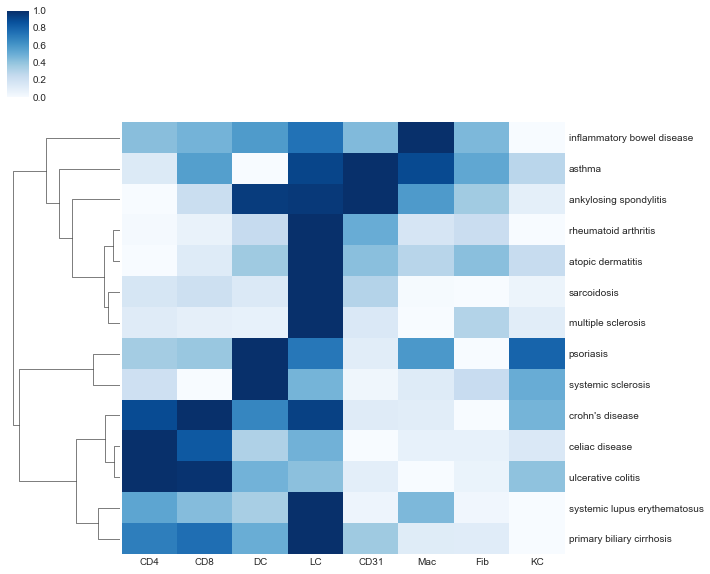

In [311]:

#对这些不同疾病的SNP 富集结果进行展示

fig=sns.clustermap(HMPDF.T.dropna(),row_cluster=True,col_cluster=False,cmap='Blues',method='average', metric='correlation')
fig.savefig(outfile+'Heatmap.pdf')
plt.show()


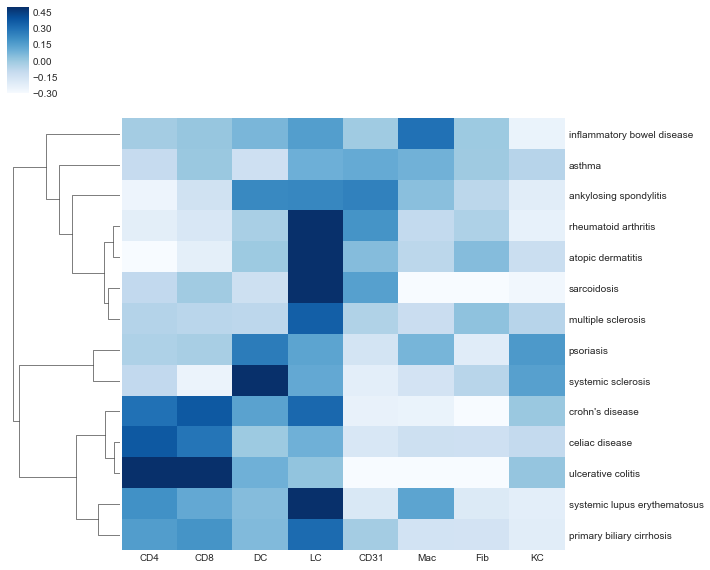

In [312]:
fig=sns.clustermap(Raw_HMPDF.T.dropna(),row_cluster=True,col_cluster=False,cmap='Blues',method='average', metric='correlation',vmin=-0.3,vmax=0.5)                  
fig.savefig(outfile+'Heatmap.rawdata.pdf')
plt.show()



In [317]:
Raw_HMPDF

,psoriasis,systemic lupus erythematosus,chronic kidney disease,asthma,crohn's disease,rheumatoid arthritis,atopic dermatitis,ankylosing spondylitis,celiac disease,sarcoidosis,inflammatory bowel disease,multiple sclerosis,systemic sclerosis,primary biliary cirrhosis,ulcerative colitis
CD4,-0.037790,0.201942,NaN,-0.098165,0.299737,-0.218578,-0.343190,-0.259317,0.372121,-0.088736,-0.014833,-0.056214,-0.088149,0.160251,0.652747
CD8,-0.021949,0.120364,NaN,0.007349,0.372631,-0.174776,-0.224467,-0.143486,0.285710,-0.008637,0.013068,-0.071169,-0.250625,0.191561,0.639960
DC,0.268224,0.049760,NaN,-0.131482,0.142002,-0.025942,0.002238,0.226572,0.001943,-0.128412,0.071345,-0.076850,0.533253,0.057006,0.091882
LC,0.137440,0.561660,NaN,0.094031,0.326281,0.599275,0.581599,0.232335,0.091002,1.319252,0.159154,0.353654,0.121813,0.318163,0.024492
CD31,-0.154817,-0.179033,NaN,0.113189,-0.239096,0.190840,0.049989,0.251307,-0.174949,0.152265,-0.003206,-0.044875,-0.219646,-0.013549,-0.318084
Mac,0.075103,0.137242,NaN,0.088607,-0.248667,-0.091909,-0.072178,0.040516,-0.131227,-0.348451,0.297488,-0.113517,-0.150932,-0.148948,-0.427518
Fib,-0.207868,-0.190782,NaN,-0.001156,-0.326072,-0.039298,0.048962,-0.072911,-0.132025,-0.365425,0.000874,0.031080,-0.062969,-0.151124,-0.356599
KC,0.172438,-0.219742,NaN,-0.061161,0.006574,-0.234595,-0.115947,-0.209505,-0.094065,-0.273212,-0.247305,-0.060752,0.147466,-0.211327,0.015945


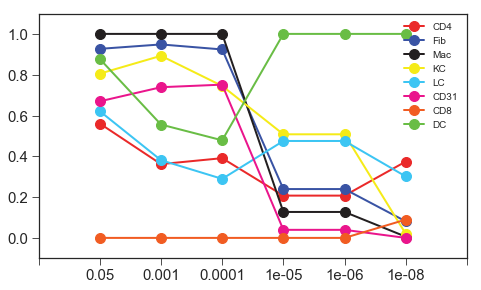

In [305]:

#不同pvalue筛选下不同细胞类型Enrichment score的折线图
plt.style.use('seaborn-white')
X=[-1,0,1,2,3,4,5,6]
fig=plt.figure(figsize=(7,4))
ax=fig.add_axes([0.1,0.1,0.85,0.85])
ax.set_xlim([0.1,5.1])
ax.set_ylim([-0.1,1.1])
ax.set_xticks(X)
ax.set_xticklabels(['']+LpValue+[''],rotation='horizontal')
for celltype in ColorDict:
    color=ColorDict[celltype]
    ax.plot(range(6),EnrichS.loc[celltype],c=color,label=celltype,marker='o',markersize=10,linewidth=2)
    
    
    
ax.tick_params(axis='y',length=7,labelsize=15,direction='out')
ax.tick_params(axis='x',length=7,labelsize=15,direction='out')

plt.legend()
plt.show()
fig.savefig(outfile+'.plot.pdf')



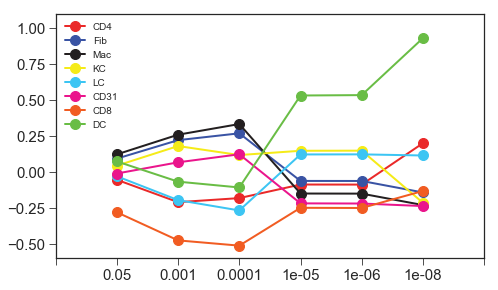

In [316]:
#不同pvalue筛选下不同细胞类型Enrichment score的折线图
plt.style.use('seaborn-white')
X=[-1,0,1,2,3,4,5,6]
fig=plt.figure(figsize=(7,4))
ax=fig.add_axes([0.1,0.1,0.85,0.85])
ax.set_xlim([0.1,5.1])
ax.set_ylim([-0.6,1.1])
ax.set_xticks(X)
ax.set_xticklabels(['']+LpValue+[''],rotation='horizontal')
for celltype in ColorDict:
    color=ColorDict[celltype]
    ax.plot(range(6),Raw_EnrichS.loc[celltype],c=color,label=celltype,marker='o',markersize=10,linewidth=2)
    
    
    
ax.tick_params(axis='y',length=7,labelsize=15,direction='out')
ax.tick_params(axis='x',length=7,labelsize=15,direction='out')
plt.legend()
plt.show()
fig.savefig(outfile+'.plot.raw.pdf')
